In [1]:
#cc

In [2]:
### The required libraries and packages ###
import networkx as nx
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
#reading the data
df = pd.read_csv("/content/drive/MyDrive/sna_project/df_db_int_sm.csv",encoding="utf-8")
df.head() 

,Unnamed: 0,drug1_name,drug2_name,weight
0,0,Bivalirudin,Simvastatin,1
1,1,Goserelin,Metformin,1
2,2,Daptomycin,Simvastatin,1
3,3,Cyclosporine,Simvastatin,1
4,4,Cyclosporine,Lisinopril,1


In [5]:
df1 = df.head(100)

In [6]:
interactions = df1[['drug1_name', 'drug2_name', 'weight']]  

In [7]:
G=nx.Graph(name='Drug Drug Interaction Graph')
interactions = np.array(interactions)
for i in range(len(interactions)):
    interaction = interactions[i]
    a = interaction[0] # protein a node
    b = interaction[1] # protein b node
    w = float(interaction[2]) # score as weighted edge where high scores = low weight
    G.add_weighted_edges_from([(a,b,w)]) # add weighted edge to graph

In [8]:
#nx.info(G)
# Obtain general information of graph
print(nx.info(G))

# Get graph density
density = nx.density(G)
print("Network density:", density)

Graph named 'Drug Drug Interaction Graph' with 76 nodes and 100 edges
Network density: 0.03508771929824561


In [9]:
from operator import itemgetter

# Create dictionary to store degrees of nodes
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

# Generate sorted list of tuples of drug entity and corresponding degree
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 drugs by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 drugs by degree:
('Simvastatin', 41)
('Lisinopril', 32)
('Metformin', 27)
('Cyclosporine', 2)
('Fluvoxamine', 2)
('Ramipril', 2)
('Amphetamine', 2)
('Bortezomib', 2)
('Betaxolol', 2)
('Sildenafil', 2)
('Remikiren', 2)
('Torasemide', 2)
('Citalopram', 2)
('Nelfinavir', 2)
('Indinavir', 2)
('Lovastatin', 2)
('Pregabalin', 2)
('Methyclothiazide', 2)
('Aminosalicylic Acid', 2)
('Ranolazine', 2)


In [10]:
nx.average_degree_connectivity(G)

{1: 34.80434782608695,
 2: 33.94444444444444,
 27: 1.5555555555555556,
 32: 1.59375,
 41: 1.4878048780487805}

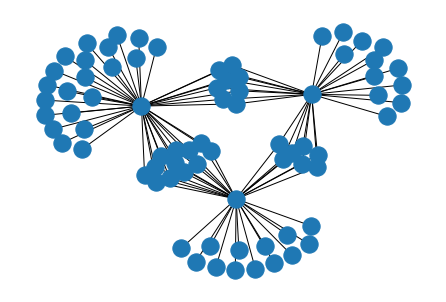

In [11]:
nx.draw_spring(G)

In [12]:
nx.degree(G)

DegreeView({'Bivalirudin': 1, 'Simvastatin': 41, 'Goserelin': 1, 'Metformin': 27, 'Daptomycin': 1, 'Cyclosporine': 2, 'Lisinopril': 32, 'Octreotide': 1, 'Lipoic Acid': 1, 'Cholecalciferol': 1, 'Pravastatin': 1, 'Fluvoxamine': 2, 'Valsartan': 1, 'Ramipril': 2, 'Masoprocol': 1, 'Amphetamine': 2, 'Esmolol': 1, 'Bortezomib': 2, 'Tramadol': 1, 'Betaxolol': 2, 'Fluconazole': 1, 'Erythromycin': 1, 'Caffeine': 1, 'Sildenafil': 2, 'Dofetilide': 1, 'Reserpine': 1, 'Azithromycin': 1, 'Ticlopidine': 1, 'Trospium': 1, 'Adapalene': 1, 'Remikiren': 2, 'Torasemide': 2, 'Citalopram': 2, 'Bethanidine': 1, 'Moxifloxacin': 1, 'Nelfinavir': 2, 'Glimepiride': 1, 'Indinavir': 2, 'Guanadrel': 1, 'Lovastatin': 2, 'Pregabalin': 2, 'Methyclothiazide': 2, 'Aminosalicylic Acid': 2, 'Nevirapine': 1, 'Ranolazine': 2, 'Mesalazine': 2, 'Ziprasidone': 2, 'Methysergide': 1, 'Cabergoline': 2, 'Phenytoin': 1, 'Doxycycline': 1, 'Diethylstilbestrol': 2, 'Clotrimazole': 1, 'Sulfanilamide': 1, 'Sulfisoxazole': 2, 'Metoprolol'

(array([73.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.]),
 array([ 1.,  5.,  9., 13., 17., 21., 25., 29., 33., 37., 41.]),
 <a list of 10 Patch objects>)

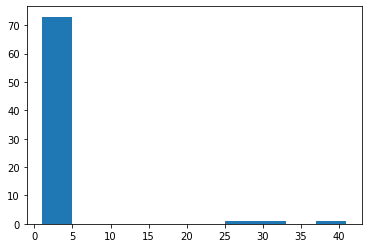

In [13]:
plt.hist([v for k, v in nx.degree(G)])
#most of them have between 0 and 40 neighbors

(array([73.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.]),
 array([0.01333333, 0.06666667, 0.12      , 0.17333333, 0.22666667,
        0.28      , 0.33333333, 0.38666667, 0.44      , 0.49333333,
        0.54666667]),
 <a list of 10 Patch objects>)

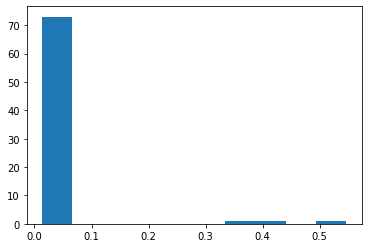

In [14]:
plt.hist(nx.centrality.degree_centrality(G).values())

(array([73.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.]),
 array([0.        , 0.05913286, 0.11826572, 0.17739858, 0.23653144,
        0.2956643 , 0.35479716, 0.41393001, 0.47306287, 0.53219573,
        0.59132859]),
 <a list of 10 Patch objects>)

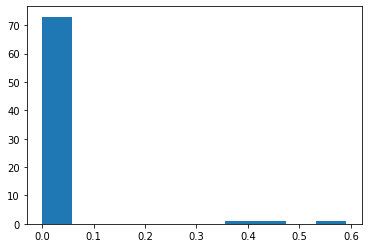

In [15]:
plt.hist(nx.centrality.betweenness_centrality(G).values())
#degree_centrality

(array([25., 21.,  0.,  7.,  0., 20.,  1.,  1.,  0.,  1.]),
 array([0.30864198, 0.33096927, 0.35329656, 0.37562385, 0.39795114,
        0.42027843, 0.44260573, 0.46493302, 0.48726031, 0.5095876 ,
        0.53191489]),
 <a list of 10 Patch objects>)

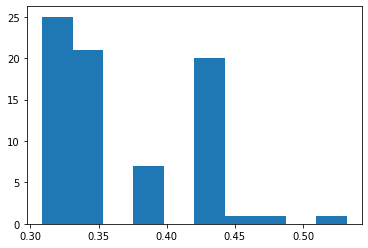

In [16]:
plt.hist(nx.centrality.closeness_centrality(G).values())

In [17]:
#nx.diameter(G)#furthest distance

In [18]:
nx.cluster.average_clustering(G)

0.0

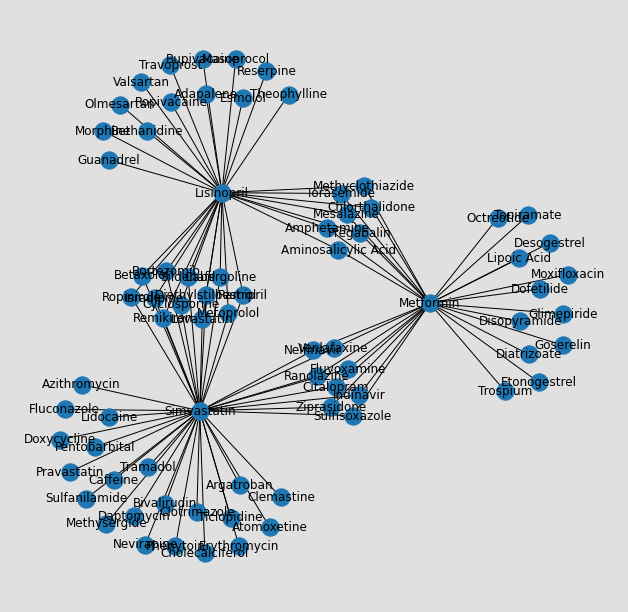

In [19]:
pos = nx.spring_layout(G) # position the nodes using the spring layout
plt.figure(figsize=(11,11),facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G)
plt.axis('off')
plt.show()

In [20]:
# create an undirected unweighted graph g based on that dataframe
#import community as community_louvain
#import networkx as nx
import community.community_louvain

In [21]:
#g = nx.read_edgelist('/content/drive/MyDrive/sna_project/df_db_int_sm.csv', create_using=nx.Graph(), nodetype=int)
#g = nx.from_pandas_edgelist(df,edge_key="source", edge_attr=['Source', 'Destination'],create_using=nx.MultiGraph())
partition = community.community_louvain.best_partition(G)

In [22]:
len(partition)

76

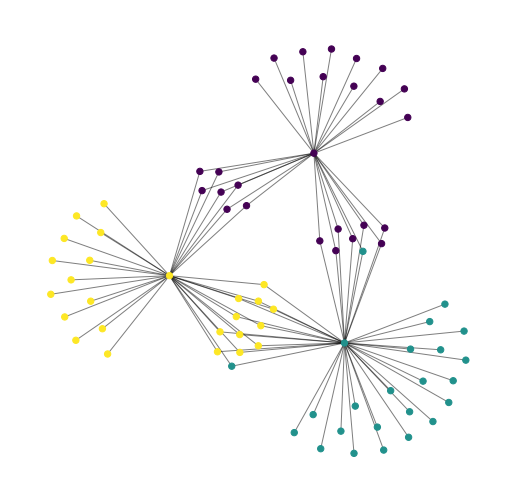

In [32]:
# draw the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(9,9))
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                        cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.axis('off')
plt.show()

In [24]:
!pip install nxcom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement nxcom (from versions: none)
ERROR: No matching distribution found for nxcom


In [25]:
# Find the communities
from networkx.algorithms.community import greedy_modularity_communities
communities = sorted(greedy_modularity_communities(G),
key=len, reverse=True)
# Count the communities
len(communities)

3

In [26]:
def set_node_community(G, communities):
 '''Add community to node attributes'''
 for c, v_c in enumerate(communities):
  for v in v_c:
    # Add 1 to save 0 for external edges
    G.nodes[v]['community'] = c + 1


In [27]:
def set_edge_community(G):
 '''Find internal edges and add their community to their attributes'''
 for v, w, in G.edges:
  if G.nodes[v]['community'] == G.nodes[w]['community']:
    # Internal edge, mark with community
    G.edges[v, w]['community'] = G.nodes[v]['community']
  else:
    # External edge, mark as 0
    G.edges[v, w]['community'] = 0


In [28]:
def get_color(i, r_off=1, g_off=1, b_off=1):
 r0, g0, b0 = 0, 0, 0
 n = 16
 low, high = 0.1, 0.9
 span = high - low
 r = low + span * (((i + r_off) * 3) % n) / (n - 1)
 g = low + span * (((i + g_off) * 5) % n) / (n - 1)
 b = low + span * (((i + b_off) * 7) % n) / (n - 1)
 return (r, g, b)


In [29]:
# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)
# Set community color for nodes
node_color = [
 get_color(G.nodes[v]['community'])
 for v in G.nodes]
# Set community color for internal edges
external = [
 (v, w) for v, w in G.edges
 if G.edges[v, w]['community'] == 0]
internal = [
 (v, w) for v, w in G.edges
 if G.edges[v, w]['community'] > 0]
internal_color = [
 get_color(G.edges[e]['community'])
 for e in internal]

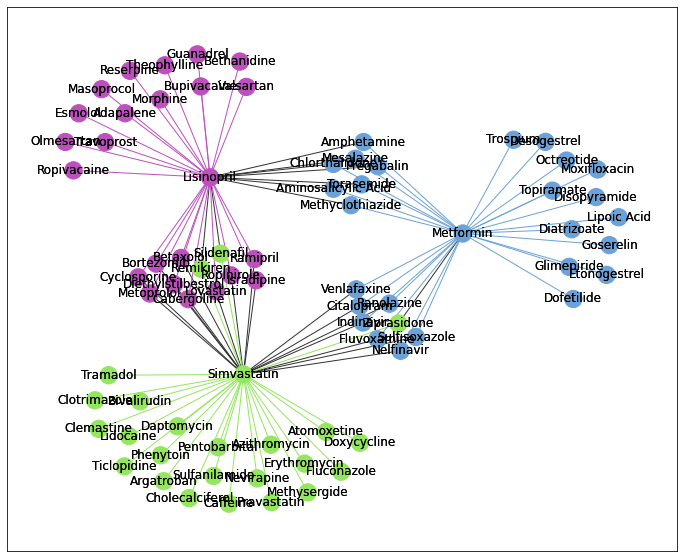

In [31]:
drug_pos = nx.spring_layout(G)
plt.figure(figsize=(12,10))
# Draw external edges
nx.draw_networkx(
 G, pos=drug_pos, node_size=0,
 edgelist=external, edge_color="#333333")
# Draw nodes and internal edges
nx.draw_networkx(
 G, pos=drug_pos, node_color=node_color,
 edgelist=internal, edge_color=internal_color)
